<h1><strong>Logistic Regression</strong></h1>

In [354]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # Plt 填充
import seaborn as sns
import random
import pandas as pd

In [13]:
x = np.arange(-50,50,0.1)
y = 1/(1+np.e**(-x)) 

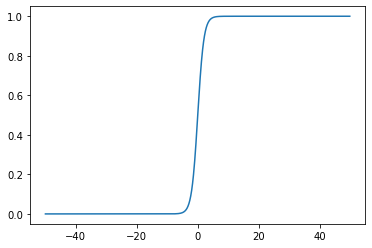

In [22]:
plt.plot(x,y)
plt.show()

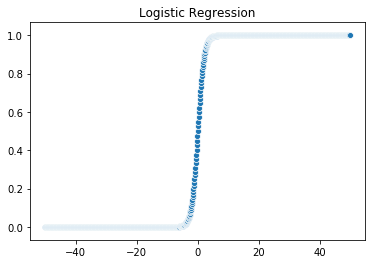

In [32]:
sns.scatterplot(x,y)
plt.title("Logistic Regression")
plt.show()

In [30]:
#某圖片特徵值
a = np.array([0.62, 0.97, 0.05, 0.33])
#加權值
b = np.array([0.26, 0.18 ,0.22 ,0.1])

In [31]:
v=np.sum(a*b)
print (1/(1 + (np.e ** (-v))))

0.5938248644605354


<h3>Credit Card Sample</h3>

In [88]:
# yeardollor=np.random.randint(low=12000, high=80000, size=12) #隨機產生數組
yeardollor = [12000, 14000, 25000, 28000, 38000, 45000, 50000, 55000, 60000, 66000, 73000, 75000]
creditsdecisions=["denied"]*4 + ["approved"] + ["denied"]*2 + ["approved"]*5

In [89]:
creditdata = {
    "Year":yeardollor,
    "Decision":creditsdecisions
}
creditdata = pd.DataFrame(creditdata)

In [90]:
creditdata

,Year,Decision
0,12000,denied
1,14000,denied
2,25000,denied
3,28000,denied
4,38000,approved
5,45000,denied
6,50000,denied
7,55000,approved
8,60000,approved
9,66000,approved


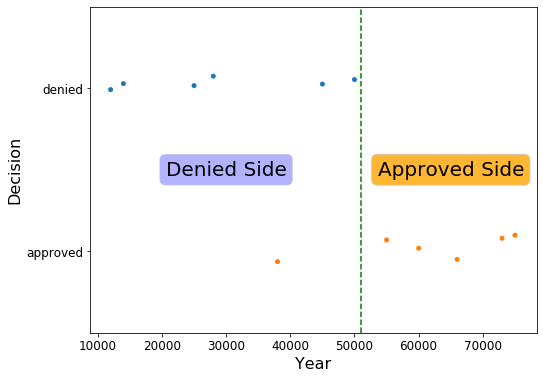

In [94]:
plt.figure(figsize=(8,6))
cpt = sns.stripplot(data=creditdata, x="Year", y="Decision")
plt.xlabel("Year", fontsize = 16) # X label字型大小
plt.ylabel("Decision", fontsize = 16) # Y label字型大小
plt.xticks(fontsize=12) # X 刻度字型大小
plt.yticks(fontsize=12) # Y 刻度字型大小
plt.axvline(x=51000, linestyle="--", color='green') # x軸畫垂直線
#文字 box
bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.8)
cpt.text(65000, 0.5, "Approved Side", ha="center", va="center", size=20, bbox=bbox_props_approved)
bbox_props_denied = dict(boxstyle="round", fc="blue", ec="0.8", alpha=0.3)
cpt.text(30000, 0.5, "Denied Side", ha="center", va="center", size=20, bbox=bbox_props_denied)
plt.show()

<h4>Sample Feature</h4>

In [95]:
credit_scores = [580, 600, 620, 640, 680, 670, 650, 700, 690, 710, 680, 715]

In [98]:
creditdata["credit_score"] = credit_scores
creditdata.head(3)

,Year,Decision,credit_score
0,12000,denied,580
1,14000,denied,600
2,25000,denied,620


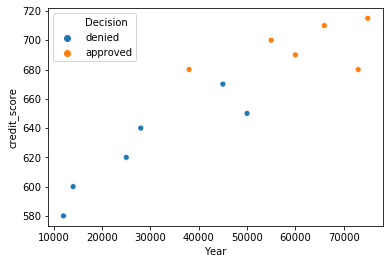

In [105]:
# Feature vs year
sns.scatterplot(data=creditdata, x="Year", y="credit_score", hue="Decision")
plt.show()

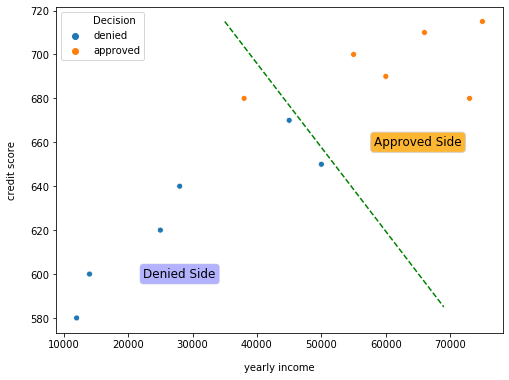

In [115]:
plt.figure(figsize=(8,6))
cpt2=sns.scatterplot(data=creditdata, x="Year", y="credit_score", hue="Decision")
plt.xlabel("yearly income", labelpad=13)
plt.ylabel("credit score", labelpad=13)
plt.plot([35000, 69000], [715, 585], linestyle="--", color='green')
bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.8)
cpt2.text(65000, 660, "Approved Side", ha="center", va="center", size=12, bbox=bbox_props_approved)
bbox_props_denied = dict(boxstyle="round", fc="blue", ec="0.8", alpha=0.3)
cpt2.text(28000, 600, "Denied Side", ha="center", va="center", size=12, bbox=bbox_props_denied)
plt.show()

<h3>Classification</h3>

<h3>1.Linear Regression</h3>

In [140]:
dd=creditdata[creditdata["Decision"]=="denied"]
ad=creditdata[creditdata["Decision"]=="approved"]
dd.loc[:,"Label"]=0
ad.loc[:,"Label"]=1

In [149]:
creditdata2 = pd.concat([dd,ad])

In [150]:
creditdata2

,Year,Decision,credit_score,Label
0,12000,denied,580,0
1,14000,denied,600,0
2,25000,denied,620,0
3,28000,denied,640,0
5,45000,denied,670,0
6,50000,denied,650,0
4,38000,approved,680,1
7,55000,approved,700,1
8,60000,approved,690,1
9,66000,approved,710,1


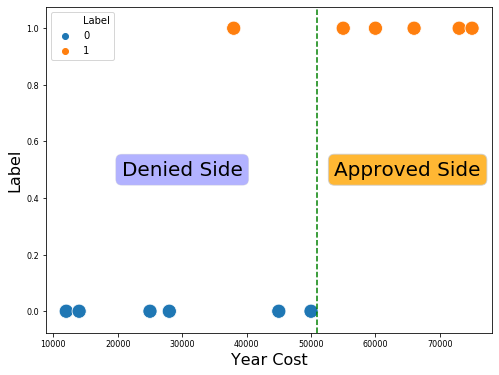

In [227]:
plt.figure(figsize=(8,6))
cpt3 = sns.scatterplot(data=creditdata2, x="Year", y="Label", hue="Label", s=200)
plt.xlabel("Year Cost", fontsize = 16) # X label字型大小
plt.ylabel("Label", fontsize = 16) # Y label字型大小
plt.xticks(fontsize=8) # X 刻度字型大小
plt.yticks(fontsize=8) # Y 刻度字型大小
plt.axvline(51000, linestyle="--", color='green') # x軸畫垂直線
# 文字 box
bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.8)
cpt3.text(65000, 0.5, "Approved Side", ha="center", va="center", size=20, bbox=bbox_props_approved)
bbox_props_denied = dict(boxstyle="round", fc="blue", ec="0.8", alpha=0.3)
cpt3.text(30000, 0.5, "Denied Side", ha="center", va="center", size=20, bbox=bbox_props_denied)
plt.show()

In [191]:
from sklearn.linear_model import LogisticRegression, LinearRegression
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()

In [215]:
train_x = creditdata2["Year"].values.reshape(-1,1) #(轉成array)
train_y = creditdata2["Label"].values

In [216]:
linear_regression_fit = linear_regression.fit(train_x, train_y)

In [221]:
print(linear_regression_fit.coef_)
print(linear_regression_fit.intercept_)

[1.83358404e-05]
-0.3266408043702007


In [261]:
# 預測 min cost - max cost
min_cost = creditdata2['Year'].values.reshape(-1,1).min()
max_cost = creditdata2['Year'].values.reshape(-1,1).max()
test_x = np.array([[min_cost],[max_cost]])
test_x

array([[12000],
       [75000]], dtype=int64)

In [264]:
predict_y = linear_regression.predict(test_x)
predict_y

array([-0.10661072,  1.04854723])

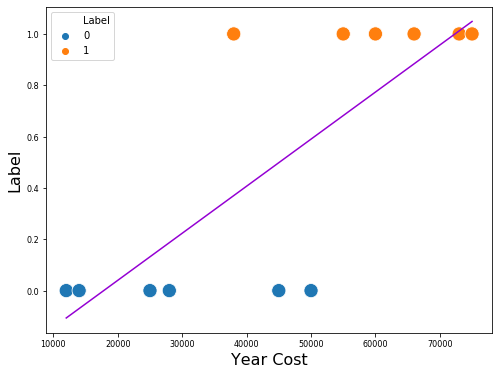

In [265]:
plt.figure(figsize=(8,6))
cpt3 = sns.scatterplot(data=creditdata2, x="Year", y="Label", hue="Label", s=200)
plt.xlabel("Year Cost", fontsize = 16) # X label字型大小
plt.ylabel("Label", fontsize = 16) # Y label字型大小
plt.xticks(fontsize=8) # X 刻度字型大小
plt.yticks(fontsize=8) # Y 刻度字型大小
plt.plot([min_cost, max_cost], [predict_y[0], predict_y[1]], c='darkviolet')
plt.show()

<h3>Predict 50000</h3>

In [282]:
test_50000 = np.array([50000]).reshape(1, 1)
predict_50000 = linear_regression.predict(test_50000)

In [283]:
predict_50000

array([0.59015122])

<h5>predict_50000 is grater than 0.5</h5>

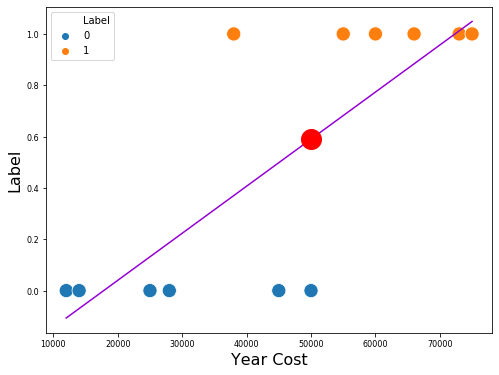

In [327]:
plt.figure(figsize=(8,6))
cpt3 = sns.scatterplot(data=creditdata2, x="Year", y="Label", hue="Label", s=200)
plt.xlabel("Year Cost", fontsize = 16) # X label字型大小
plt.ylabel("Label", fontsize = 16) # Y label字型大小
plt.xticks(fontsize=8) # X 刻度字型大小
plt.yticks(fontsize=8) # Y 刻度字型大小
plt.plot([min_cost, max_cost], [predict_y[0], predict_y[1]], c='darkviolet')
plt.plot([50000],[predict_50000], color = "red", marker="o", ms=20)
# plt.annotate(r'$\cost=50000$', xy=(50000, predict_50000), xytext=(1, 0.8), fontsize=15,
#              arrowprops=dict(facecolor='black', shrink=0.5, width=2))
plt.show()

<h3>Predict 30000</h3>

In [333]:
test_30000 = np.array([30000]).reshape(1, 1)
predict_30000 = linear_regression.predict(test_30000)

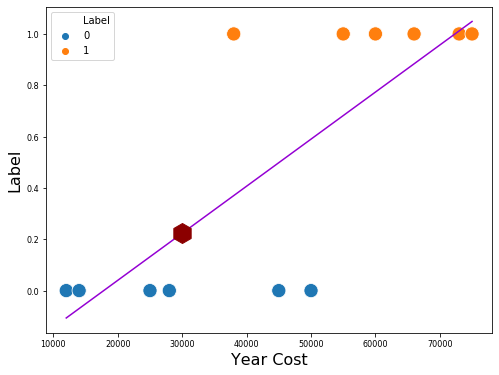

In [346]:
plt.figure(figsize=(8, 6))
pt3 = sns.scatterplot(data=creditdata2, x="Year", y="Label", hue="Label", s=200)
plt.xlabel("Year Cost", fontsize = 16)
plt.ylabel("Label", fontsize = 16)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.plot([min_cost, max_cost], [predict_y[0], predict_y[1]], c='darkviolet')
plt.plot([30000],[predict_30000], color = "darkred", marker="h", ms=20)
plt.show()

In [344]:
predict_30000 

array([0.22343441])

<h5>predict_30000 is less than 0.5</h5>

<h2>Predict Range</h2>

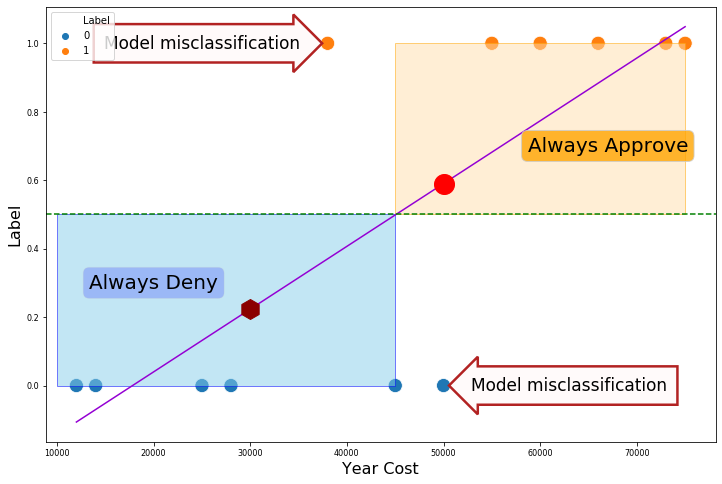

In [360]:
plt.figure(figsize=(12, 8))
pt3 = sns.scatterplot(data=creditdata2, x="Year", y="Label", hue="Label", s=200)
plt.xlabel("Year Cost", fontsize = 16)
plt.ylabel("Label", fontsize = 16)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.plot([min_cost, max_cost], [predict_y[0], predict_y[1]], c='darkviolet')
plt.plot([50000],[predict_50000], color = "red", marker="o", ms=20)
plt.plot([30000],[predict_30000], color = "darkred", marker="h", ms=20)
plt.axhline(y = 0.5, linestyle = "--", color = "green")
ax = plt.gca() #拿出當前的圖給 ax這一個變數
#增加填充
orange_rect = patches.Rectangle((45000,0.5), 30000, 0.5, linewidth=1, edgecolor='orange', facecolor='navajowhite', alpha=0.5)
ax.add_patch(orange_rect)
blue_rect = patches.Rectangle((10000, 0), 35000, 0.5, linewidth=1, edgecolor='blue', facecolor='skyblue', alpha=0.5)
ax.add_patch(blue_rect)

bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.8)
ax.text(67000, 0.7, "Always Approve", ha="center", va="center", size=20, bbox=bbox_props_approved)
bbox_props_denied = dict(boxstyle="round", fc="blue", ec="0.8", alpha=0.2)
ax.text(20000, 0.3, "Always Deny", ha="center", va="center", size=20, bbox=bbox_props_denied)

bbox_props_left = dict(boxstyle="larrow, pad=0.6", fc="snow", ec="firebrick", lw=2.5)
t = ax.text(63000, 0, "Model misclassification", ha="center", va="center", size=17, bbox=bbox_props_left)
bbox_props_left = dict(boxstyle="rarrow, pad=0.6", fc="snow", ec="firebrick", lw=2.5)
t = ax.text(25000, 1, "Model misclassification", ha="center", va="center", size=17, bbox=bbox_props_left)

plt.show()

<h3>Rich man destory linear regression</h3>

In [363]:
wealthy_person = {'Year': [250000],
        'Decision': ["approved"],
                  'credit_score': [715],
                  'Label': [1]
        }
df_wealthy = pd.DataFrame(wealthy_person)

In [364]:
creditdata2_withrich = pd.concat([creditdata2, df_wealthy])

In [370]:
creditdata2_withrich.tail(2)

,Year,Decision,credit_score,Label
11,75000,approved,715,1
0,250000,approved,715,1


In [374]:
# Predict 2
# from sklearn.linear_model import LogisticRegression, LinearRegression
train2_x = creditdata2_withrich["Year"].values.reshape(-1,1) #(轉成array)
train2_y = creditdata2_withrich["Label"].values
linear_regression2 = LinearRegression()
linear_regression2_fit = linear_regression2.fit(train2_x, train2_y)

In [377]:
min_cost_withrich = creditdata2_withrich['Year'].min()
max_cost_withrich = creditdata2_withrich['Year'].max()
print(min_cost_withrich, max_cost_withrich) 

12000 250000


In [385]:
test_withrich_x = np.array([[min_cost_withrich],[max_cost_withrich]])
predict_withrich_y = linear_regression2.predict(test_withrich_x)

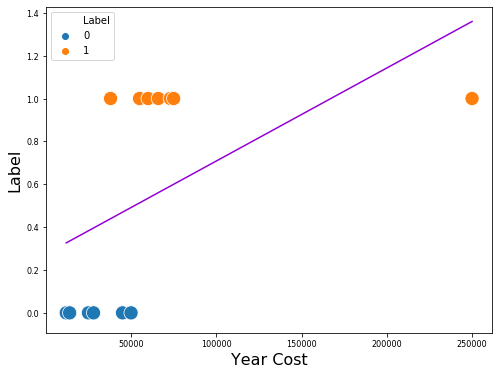

In [387]:
plt.figure(figsize=(8,6))
cpt3 = sns.scatterplot(data=creditdata2_withrich, x="Year", y="Label", hue="Label", s=200)
plt.plot([min_cost_withrich, max_cost_withrich], [predict_withrich_y[0], predict_withrich_y[1]], c='darkviolet')
plt.xlabel("Year Cost", fontsize = 16) 
plt.ylabel("Label", fontsize = 16) 
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.show()

<h4><u>Result: it cant fit on this data</u></h4>
<h5>Linear Regression數據不可以有異常值</h5>

In [395]:
zero_cost = 0
super_high_cost = 200000
zero_super_test_x = np.array([[zero_cost],[super_high_cost]])
zero_super_test_y = linear_regression.predict(zero_super_test_x)

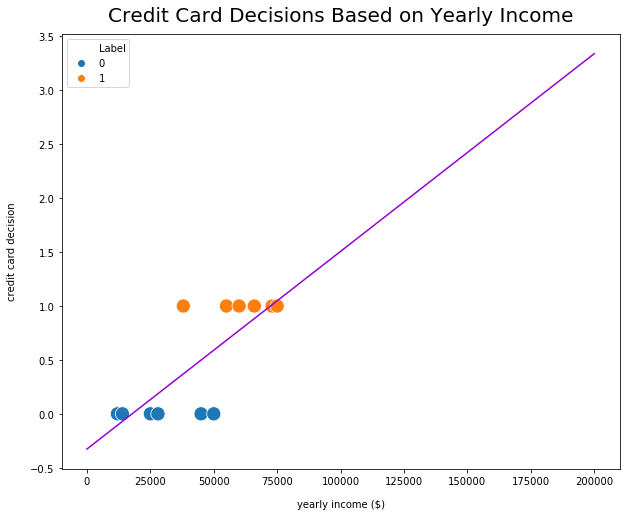

In [401]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=creditdata2, x="Year", y="Label", hue="Label", s=200)
plt.plot([zero_cost, super_high_cost], [zero_super_test_y[0], zero_super_test_y[1]], c='darkviolet')
plt.xlabel("yearly income ($)", labelpad=13)
plt.ylabel("credit card decision", labelpad=13)
plt.title("Credit Card Decisions Based on Yearly Income", y=1.015, fontsize=20)
plt.show()

<h5>計算值應當只介於0~1，該線性回歸不大適用</h5>

<h3>2.Logistic Regression</h3>

<h4><u>Sigmoid Function</u></h4>

In [403]:
x_values_for_sigmoid = np.linspace(-10, 10, 120)

In [407]:
x_values_for_sigmoid[0:5]

array([-10.        ,  -9.83193277,  -9.66386555,  -9.49579832,
        -9.32773109])

In [412]:
np.exp(1) # e自然常数為2.71828

2.718281828459045

In [413]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

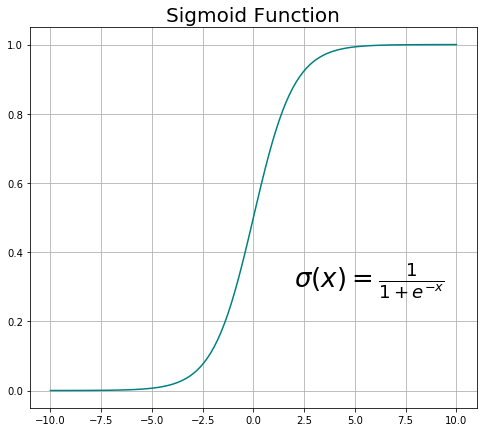

In [418]:
plt.figure(figsize=(8, 7))
plt.plot(x_values_for_sigmoid, sigmoid(x_values_for_sigmoid), c='teal') # X(-10,10) # Sigmoid 
plt.title('Sigmoid Function', fontsize=20)
plt.grid(True) # 表格
plt.text(2, 0.3, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=26)
plt.show()

<h4><u>Fit Logistic Function On Credit Card Data</u></h4>

In [423]:
yearly_cost_us_dollars = np.random.normal(loc=50000, scale=15000, size=500)
# np.random.normal : 製造常態分佈隨機數值
# loc：此機率分布平均值
# scale : 此機率分布的標準差
# size 數量

In [424]:
yearly_cost_us_dollars[0:5]

array([42482.38805286, 23231.9472203 , 57871.86240187, 44439.48770473,
       55054.2560648 ])

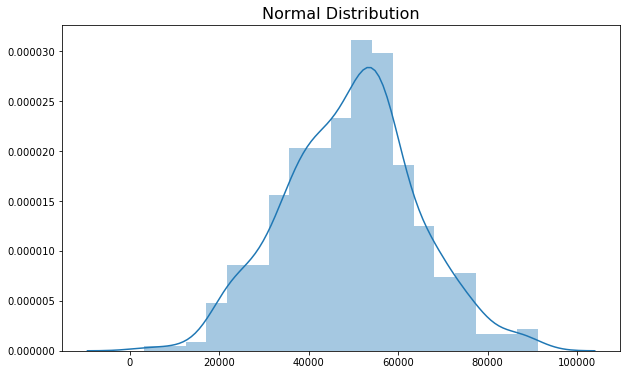

In [430]:
plt.figure(figsize=(10,6))
sns.distplot(yearly_cost_us_dollars)
plt.title("Normal Distribution", fontsize=16)
plt.show()

In [431]:
yearly_cost_us_dollars = sorted(yearly_cost_us_dollars)

In [436]:
yearly_cost_us_dollars[0:5]

[3210.611140394074,
 8288.040243953408,
 13116.996267375871,
 15937.015763538438,
 17296.31975759963]

In [438]:
credit_card_decisions = [0]*180 + [1]*4 + [0]*16 + [1]*5 + [0]*10 + [1]*(500-215)

In [457]:
application_data = {'yearly_cost': yearly_cost_us_dollars,
                    'credit_card_decision': credit_card_decisions
                    }
df_credit_card_applications2 = pd.DataFrame(application_data)

In [458]:
# pd.cut() 指定區間設定項目，分割資料
cost_bin_labels = pd.cut(df_credit_card_applications2['yearly_cost'], bins=5, labels=["very low", "low", "medium", "high", "very high"])

In [459]:
cost_bin_labels

0       very low
1       very low
2       very low
3       very low
4       very low
         ...    
495    very high
496    very high
497    very high
498    very high
499    very high
Name: yearly_cost, Length: 500, dtype: category
Categories (5, object): [very low < low < medium < high < very high]

In [463]:
df_credit_card_applications2["costlabel"] = cost_bin_labels

In [464]:
df_credit_card_applications2.head(3)

,yearly_cost,credit_card_decision,costlabel
0,3210.611140,0,very low
1,8288.040244,0,very low
2,13116.996267,0,very low


In [476]:
df_credit_card_applications2.groupby("costlabel").describe()

yearly_cost                                                         \
                count          mean          std           min           25%   
costlabel                                                                      
very low         13.0  16864.419467  5507.894343   3210.611140  15937.015764   
low             100.0  31233.327900  5073.336356  21461.005871  26920.498316   
medium          230.0  47974.237921  5269.232845  38508.526339  43067.562432   
high            132.0  62723.632652  5066.080365  56030.565193  58268.861032   
very high        25.0  80600.305799  5302.211730  74065.308051  76652.511603   

                                                    credit_card_decision  \
                    50%           75%           max                count   
costlabel                                                                  
very low   19691.179537  20436.351943  20680.989540                 13.0   
low        32457.673722  35520.826993  38387.887866                100.0   
medium     48525.494435  52727.677371  55952.412767                230.0   
high       61745.899204  66965.823023  73603.740575                132.0   
very high  77679.156288  85737.962662  91203.610733                 25.0   

                                                        
               mean       std  min  25%  50%  75%  max  
costlabel                                               
very low   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
low        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
medium     0.595652  0.491836  0.0  0.0  1.0  1.0  1.0  
high       1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
very high  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

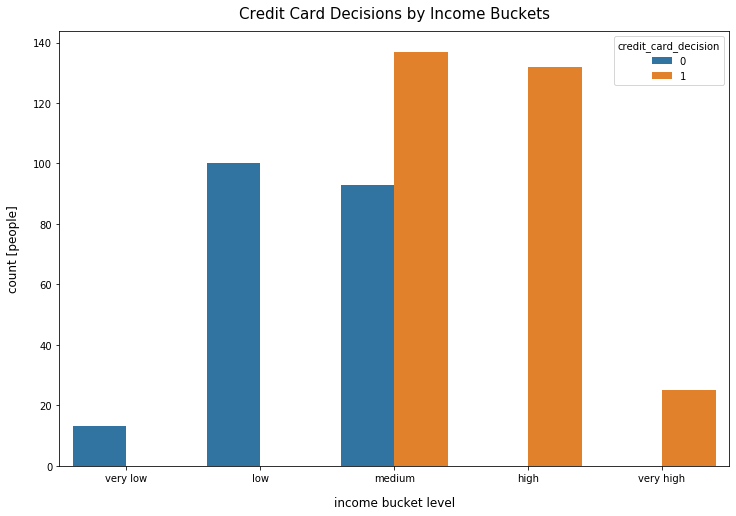

In [482]:
plt.figure(figsize=(12, 8))
sns.countplot(x='costlabel', hue='credit_card_decision', data=df_credit_card_applications2)
plt.title("Credit Card Decisions by Income Buckets", y=1.015, fontsize=15)
plt.ylabel("count [people]", labelpad=13, fontsize = 12)
plt.xlabel("income bucket level", labelpad=13 , fontsize = 12)
plt.show()

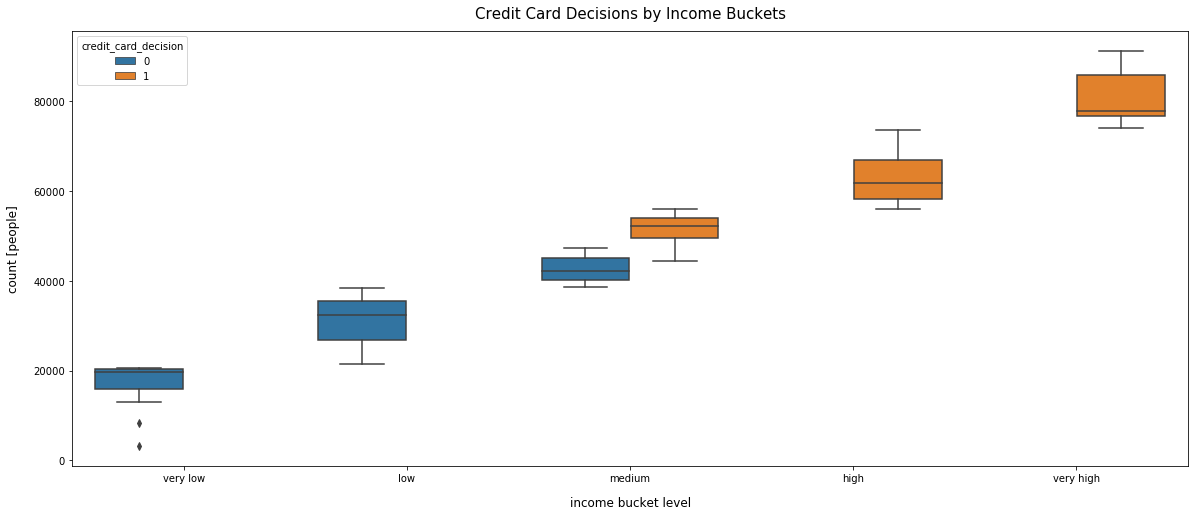

In [497]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_credit_card_applications2, x="costlabel", y="yearly_cost", hue="credit_card_decision")
plt.title("Credit Card Decisions by Income Buckets", y=1.015, fontsize=15)
plt.ylabel("count [people]", labelpad=13, fontsize = 12)
plt.xlabel("income bucket level", labelpad=13 , fontsize = 12)
plt.show()

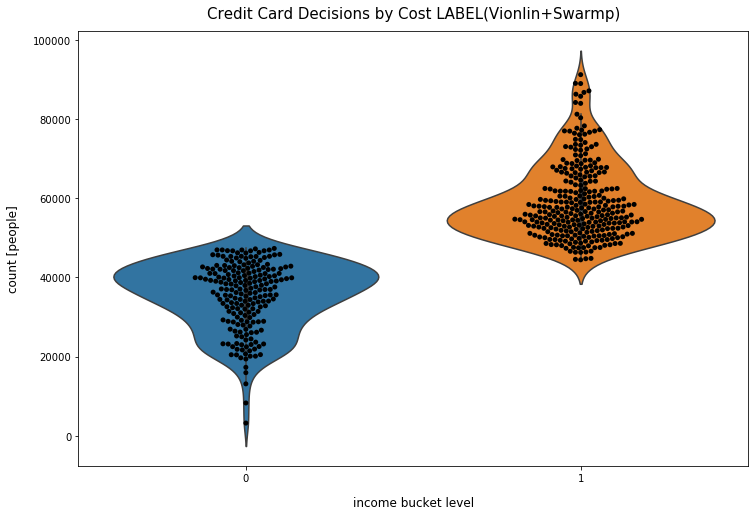

In [519]:
plt.figure(figsize=(12, 8))

sns.violinplot(data=df_credit_card_applications2, x="credit_card_decision", y="yearly_cost")
sns.swarmplot(data=df_credit_card_applications2, x="credit_card_decision", y="yearly_cost",color = "k")
plt.title("Credit Card Decisions by Cost LABEL(Vionlin+Swarmp)", y=1.015, fontsize=15)
plt.ylabel("count [people]", labelpad=13, fontsize = 12)
plt.xlabel("income bucket level", labelpad=13 , fontsize = 12)

# sns.violinplot(data=df_credit_card_applications2, x="credit_card_decision", y="yearly_cost")
# sns.catplot(data=df_credit_card_applications2, x="credit_card_decision", y="yearly_cost")
# plt.title("Credit Card Decisions by Cost LABEL(Catplot)", y=1.015, fontsize=15)
# plt.ylabel("count [people]", labelpad=13, fontsize = 12)
# plt.xlabel("income bucket level", labelpad=13 , fontsize = 12)

plt.show()

In [522]:
Lg_train_X = df_credit_card_applications2['yearly_cost'].values.reshape(-1, 1)

In [523]:
Lg_train_X[0:5]

array([[ 3210.61114039],
       [ 8288.04024395],
       [13116.99626738],
       [15937.01576354],
       [17296.3197576 ]])

<h4><u>Standardize Year Cost</u></h4>

In [525]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [529]:
Lg_train_X_scaler_fit = scaler.fit(Lg_train_X)
type(Lg_train_X_scaler_fit)

sklearn.preprocessing._data.StandardScaler

In [532]:
Lg_train_X_transformed = scaler.transform(Lg_train_X)
Lg_train_X_transformed[0:5]

array([[-3.13442665],
       [-2.78944006],
       [-2.46133601],
       [-2.26972942],
       [-2.17737133]])

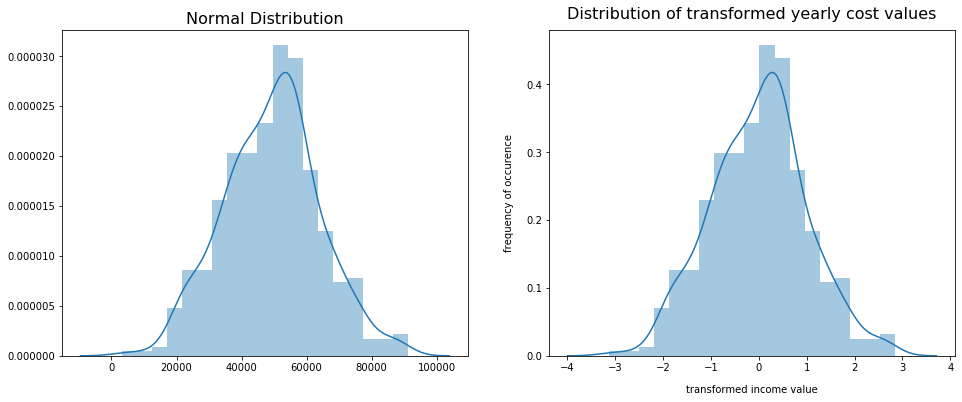

In [536]:
plt.figure(figsize=(16, 6))
plt.subplot2grid((1,2),(0,0),colspan=1)
sns.distplot(yearly_cost_us_dollars)
plt.title("Normal Distribution", fontsize=16)
plt.subplot2grid((1,2),(0,1),colspan=1)
sns.distplot(Lg_train_X_transformed)
plt.title("Distribution of transformed yearly cost values", y=1.015, fontsize = 16)
plt.xlabel("transformed income value", labelpad=12)
plt.ylabel("frequency of occurence", labelpad=12)
plt.show()

In [558]:
Lg_train_y=df_credit_card_applications2["credit_card_decision"].values

In [559]:
Log_reg = LogisticRegression()

In [560]:
from sklearn.model_selection import train_test_split
Lg_train_x, Lg_test_x, Lg_train_y, Lg_test_y = train_test_split(Lg_train_X_transformed, Lg_train_y, test_size = 0.35, random_state = 42)

In [562]:
Log_reg.fit(Lg_train_x, Lg_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h4><u>Visualization</u></h4>

In [579]:
# 返回預測屬於某標籤的概率
Lg_train_x_probability_class1= Log_reg.predict_proba(Lg_train_x)[:,1]
Lg_train_x_probability_class1[0]

0.27049419663200275

In [581]:
# flatten() 合成一個矩陣
Lg_predictions = {"x_train_points": Lg_train_x.flatten(),
                 "x_train_probability_being_class_1": Lg_train_x_probability_class1}
df_predictions = pd.DataFrame(Lg_predictions)

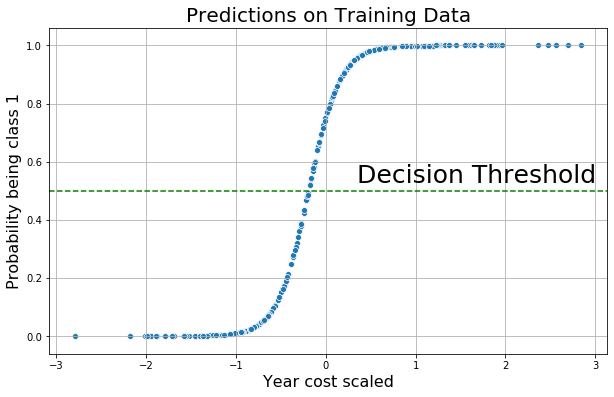

In [593]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Lg_predictions, x="x_train_points", y="x_train_probability_being_class_1")
plt.title("Predictions on Training Data", fontsize=20)
plt.xlabel("Year cost scaled", fontsize=16)
plt.ylabel("Probability being class 1", fontsize=16)
plt.axhline(y=0.5, linestyle="--", color='green')
plt.grid(True)
ax=plt.gca()
ax.text(0.35, 0.53, "Decision Threshold", size=25)
plt.show()

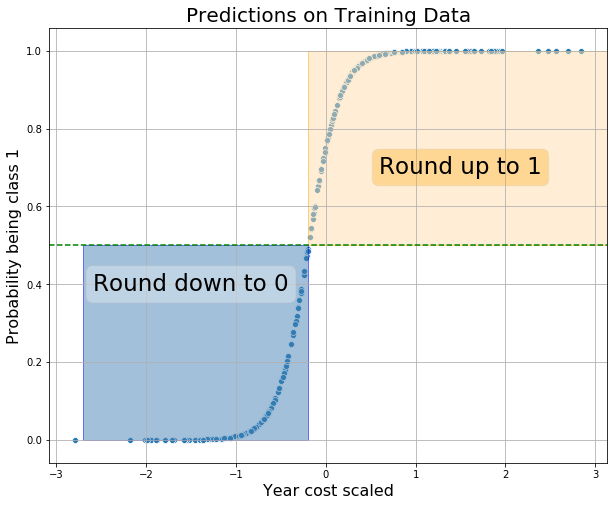

In [597]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=Lg_predictions, x="x_train_points", y="x_train_probability_being_class_1")
plt.title("Predictions on Training Data", fontsize=20)
plt.xlabel("Year cost scaled", fontsize=16)
plt.ylabel("Probability being class 1", fontsize=16)
plt.axhline(y=0.5, linestyle="--", color='green')
plt.grid(True)
ax=plt.gca()
orange_rect = patches.Rectangle((-0.2, 0.5), 3.7, 0.5, linewidth=1, edgecolor='orange', facecolor='navajowhite', alpha=0.5)
ax.add_patch(orange_rect)
bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.3)
ax.text(1.5, 0.7, "Round up to 1", ha="center", va="center", size=23, bbox=bbox_props_approved)
blue_rect = patches.Rectangle((-2.7, 0), 2.5, 0.5, linewidth=1, edgecolor='blue', facecolor='steelblue', alpha=0.5)
ax.add_patch(blue_rect)
bbox_props_denied = dict(boxstyle="round", fc="white", ec="0.8", alpha=0.3)
ax.text(-1.5, 0.4, "Round down to 0", ha="center", va="center", size=23, bbox=bbox_props_denied);
plt.show()